In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import wget

In [4]:
wget.download("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv")

100% [................................................................................] 6027 / 6027

'drug200.csv'

In [2]:
df = pd.read_csv("drug200.csv", delimiter=",")
print(df.head())
print(df.size)
print(df.shape)

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY
1200
(200, 6)


In [3]:
#Selecting the features of the dataset
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]


array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [4]:
#Selecting the Target value
y = df[['Drug']]
y[0:5]

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY


In [5]:
#convert the features to numerical values.

from sklearn import preprocessing
sex = preprocessing.LabelEncoder()
sex.fit(['F','M'])
X[:,1] = sex.transform(X[:,1])

bp = preprocessing.LabelEncoder()
bp.fit(['LOW', 'NORMAL', 'HIGH'])
X[:,2] = bp.transform(X[:,2])

chol = preprocessing.LabelEncoder()
chol.fit(['HIGH', 'NORMAL'])
X[:,3] = chol.transform(X[:,3])

print(X[0:5])


[[23 0 0 0 25.355]
 [47 1 1 0 13.093]
 [47 1 1 0 10.113999999999999]
 [28 0 2 0 7.797999999999999]
 [61 0 1 0 18.043]]


In [6]:
#Now we split the dataset into Test/Train set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 5)
(160, 1)
(40, 5)
(40, 1)


In [7]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
drugTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
drugTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
predTree = drugTree.predict(x_test)
print (predTree [0:5])
print(y_test[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
      Drug
40   drugY
51   drugX
139  drugX
197  drugX
170  drugX


In [10]:
from sklearn import metrics
f1score = metrics.f1_score(y_test, predTree, average="weighted")
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
print("F1 Score: ", f1score)

DecisionTrees's Accuracy:  1.0
F1 Score:  1.0


In [11]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

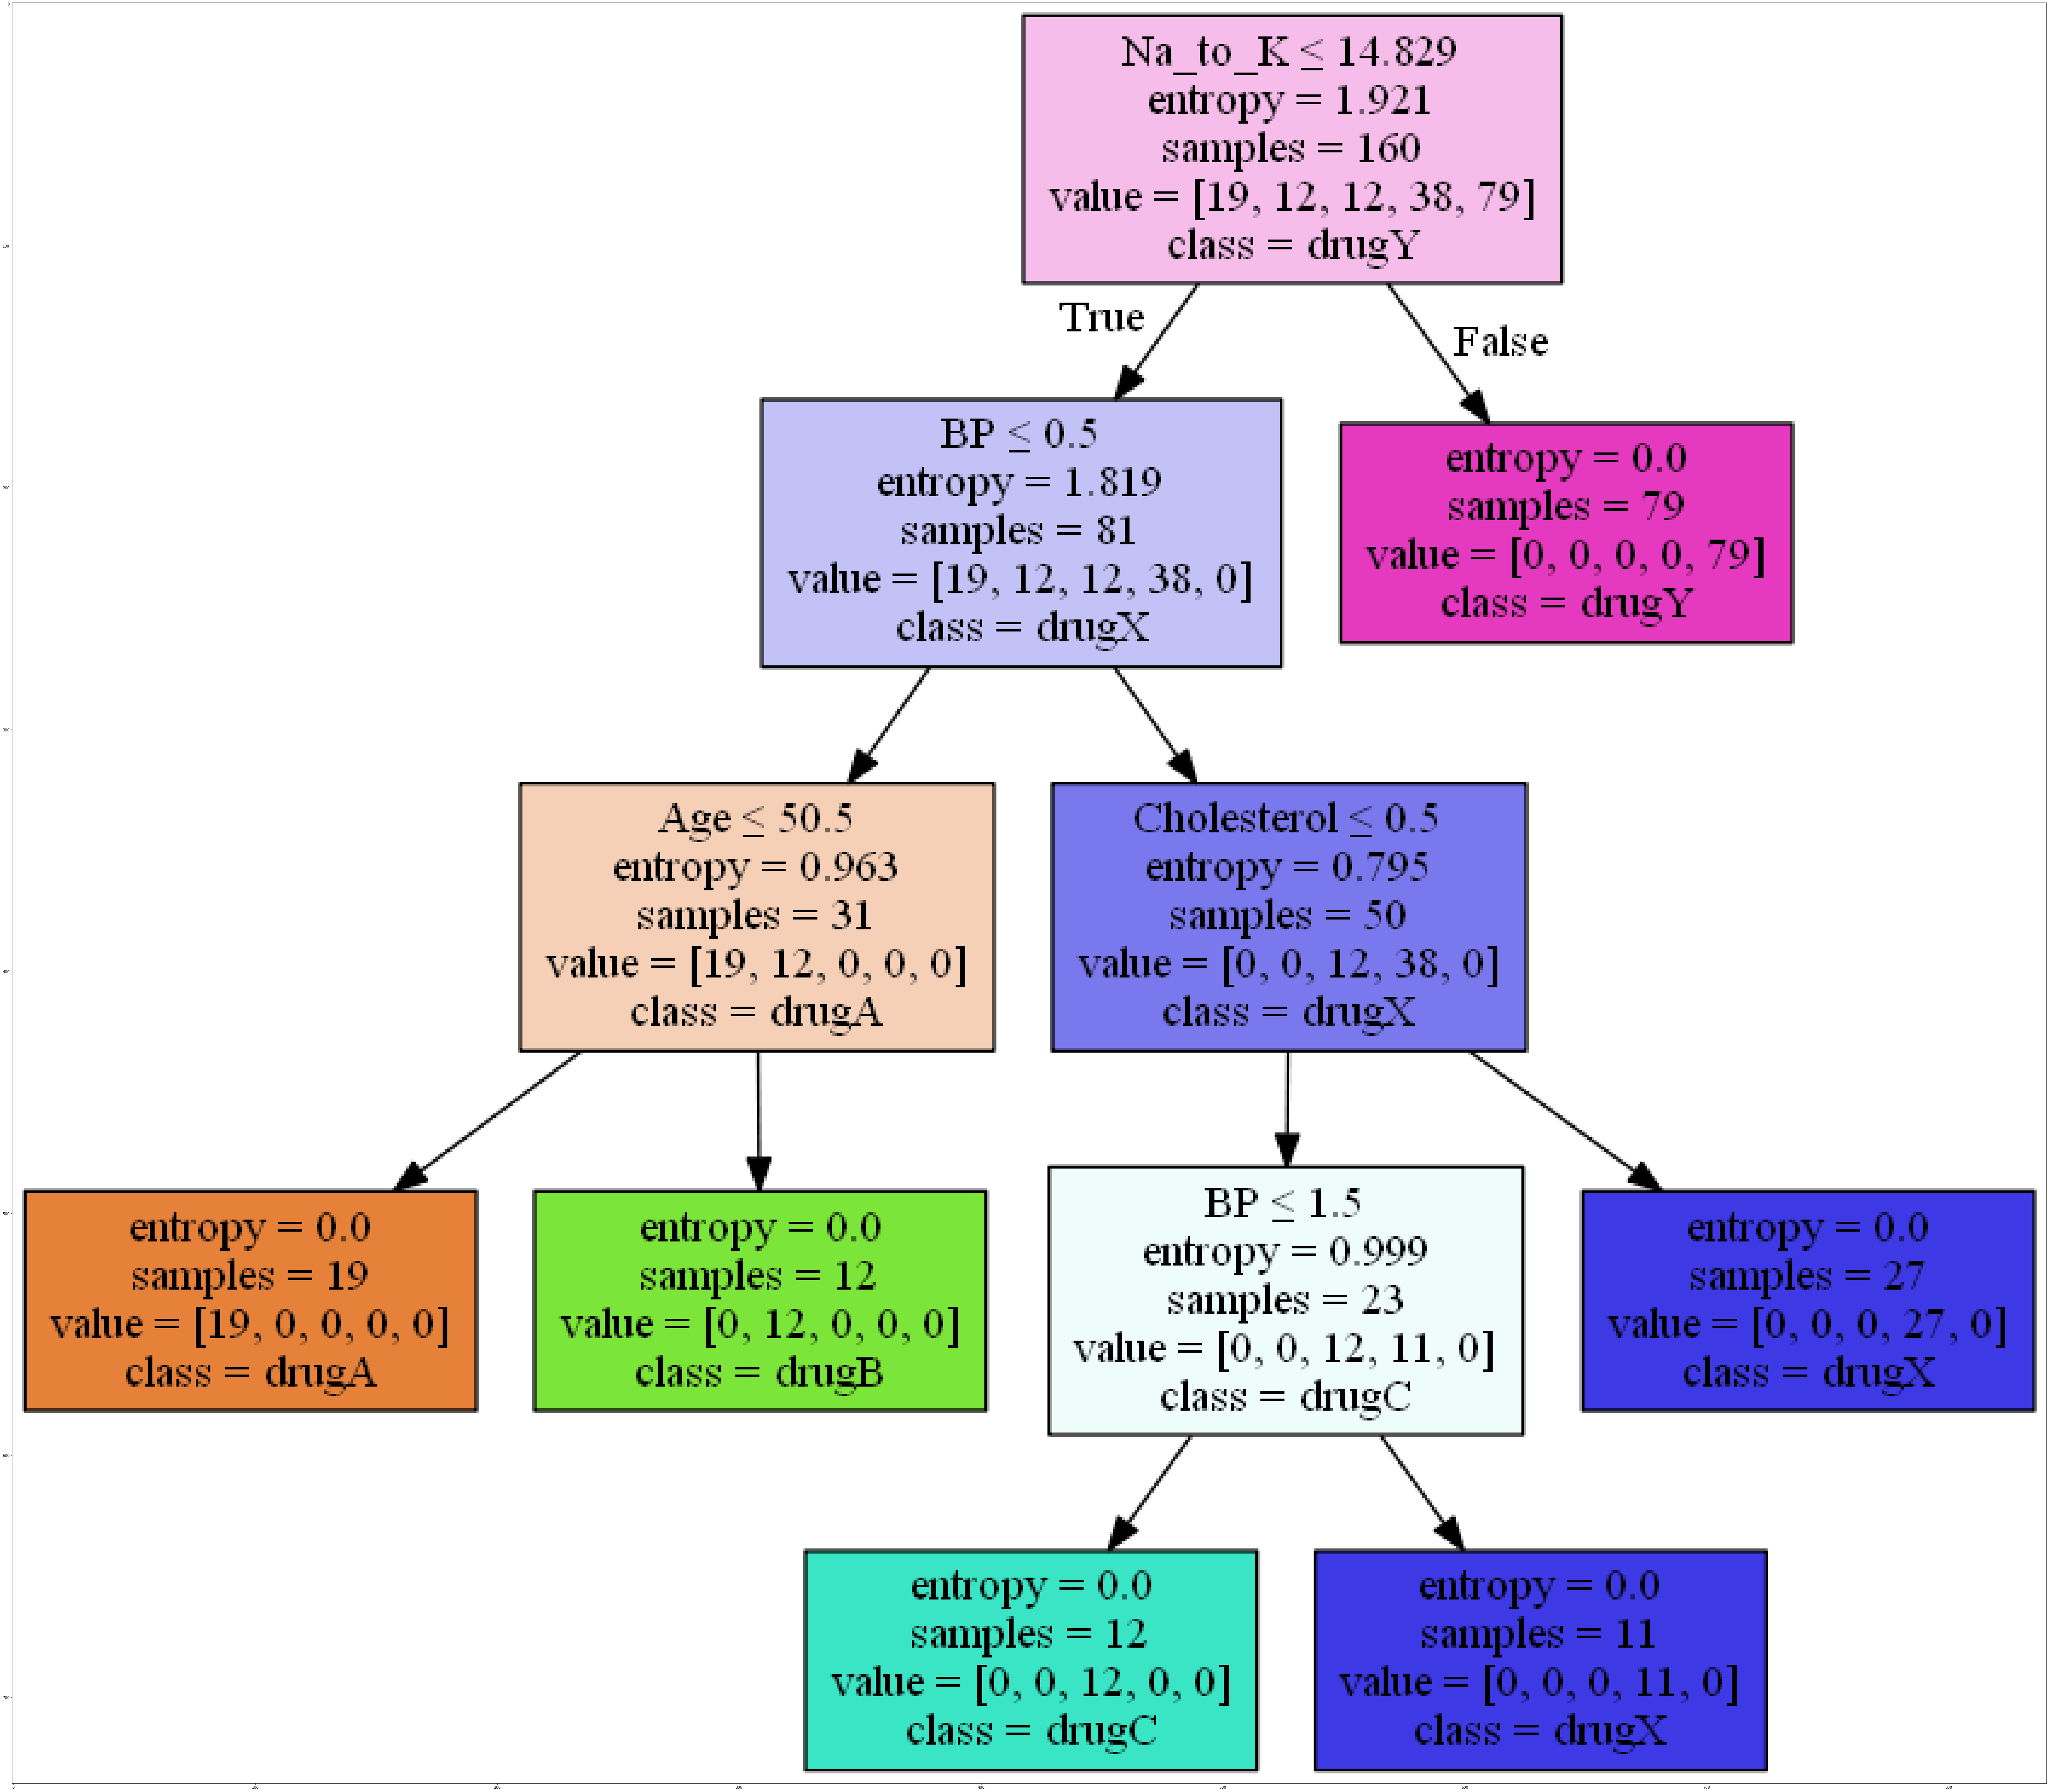

In [12]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
targetNames = df["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')